In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
'''
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
cur_dir = os.getcwd()
download_url(dataset_url, os.path.join(cur_dir, 'temp'))
'''

'\ndataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"\ncur_dir = os.getcwd()\ndownload_url(dataset_url, os.path.join(cur_dir, \'temp\'))\n'

In [3]:
'''
with tarfile.open('./temp/cifar10.tgz') as tar:
    tar.extractall(path='./data')
'''

"\nwith tarfile.open('./temp/cifar10.tgz') as tar:\n    tar.extractall(path='./data')\n"

In [4]:
'''
import glob
def Del():
 for f in files:
    os.remove(f)
files = glob.glob( os.path.join(cur_dir, 'temp/*'))
Del()
print('done')
'''

"\nimport glob\ndef Del():\n for f in files:\n    os.remove(f)\nfiles = glob.glob( os.path.join(cur_dir, 'temp/*'))\nDel()\nprint('done')\n"

In [5]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/train")
print(classes)

['train', 'test']
['horse', 'frog', 'cat', 'truck', 'dog', 'automobile', 'ship', 'bird', 'deer', 'airplane']


In [6]:
ship_test_files = os.listdir(data_dir+"/test/ship")
print("No of ship testing images: ", len(ship_test_files))
print(ship_test_files)

No of ship testing images:  1000
['0758.png', '0715.png', '0504.png', '0908.png', '0241.png', '0237.png', '0997.png', '0775.png', '0267.png', '0830.png', '0229.png', '0068.png', '0188.png', '0864.png', '0693.png', '0163.png', '0517.png', '0366.png', '0748.png', '0090.png', '0943.png', '0989.png', '0167.png', '0974.png', '0781.png', '0805.png', '0352.png', '0333.png', '0418.png', '0635.png', '0509.png', '0845.png', '0006.png', '0329.png', '0388.png', '0926.png', '0458.png', '0749.png', '0592.png', '0154.png', '0803.png', '0065.png', '0338.png', '0678.png', '0002.png', '0377.png', '0881.png', '0979.png', '0743.png', '0473.png', '0660.png', '0469.png', '0710.png', '0726.png', '0807.png', '0801.png', '0230.png', '0055.png', '0995.png', '0519.png', '0759.png', '0916.png', '0309.png', '0851.png', '0865.png', '0332.png', '0708.png', '0303.png', '0475.png', '0580.png', '0035.png', '0249.png', '0674.png', '0772.png', '0285.png', '0925.png', '0234.png', '0116.png', '0922.png', '0157.png', '0728.

In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor as Ten
dataset = ImageFolder(data_dir+'/train', transform=Ten())

In [8]:
len(dataset)

50000

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff' #reset the background color to white, mostly irrelevant

In [10]:
def show_ex(image, label):
    print('Label: ',dataset.classes[label], "("+str(label)+")")
    plt.imshow(image.permute(1,2,0))

Label:  airplane (0)


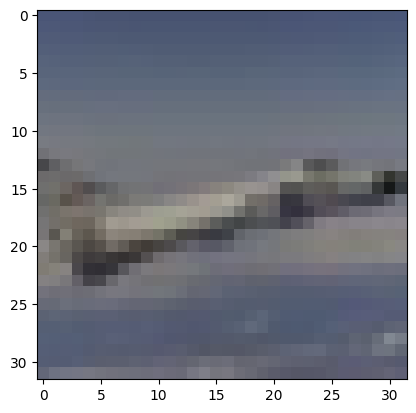

In [11]:
show_ex(*dataset[55])

In [12]:
random_seed = 666
torch.manual_seed(random_seed)
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [13]:
from torch.utils.data.dataloader import DataLoader
batch_size = 256
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, shuffle=True, num_workers=4, pin_memory=True)

In [14]:
from torchvision.utils import make_grid
def show_batch (dl):
    for images, labes in dl:
        fig, ax= plt.subplots(figsize= (12,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1,2,0))
        break

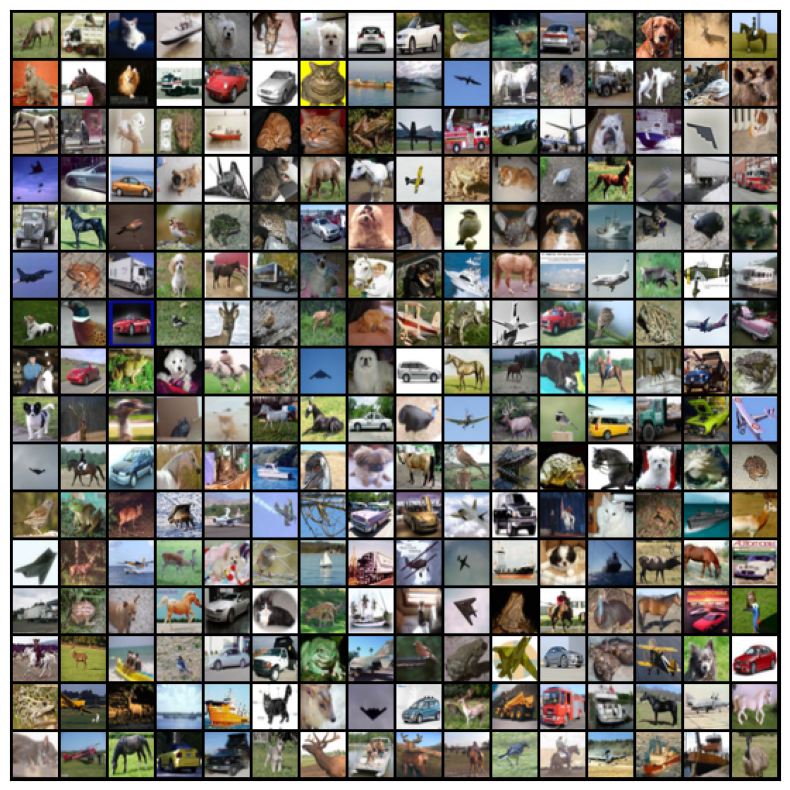

In [15]:
show_batch(train_dl)

In [16]:
def apply_kernal(image, kernal):
    ri, ci = image.shape
    rk, ck = kernal.shape
    ro, co = ri-rk+1, ci-ck+1
    outputs = torch.zeros([ro,co])
    for i in range(ro):
        for j in range(co):
            outputs[i,j] = torch.sum(image[i:i+rk,j:j+ck]*kernal)
    return outputs

In [17]:
sample_image = torch.tensor([[3, 3, 2, 1, 0],
                             [0, 0, 1, 3, 1],
                             [3, 1, 2, 2, 3],
                             [2, 0, 0, 2, 2],
                             [2, 0, 0, 0, 1]], dtype=torch.float32)
sample_kernal = torch.tensor([[0, 1, 2],
                              [2, 2, 0],
                              [0, 1, 2]], dtype=torch.float32)
apply_kernal(sample_image, sample_kernal)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [18]:
import torch.nn as nn
import torch.nn.functional as F
sample_model = nn.Sequential(nn.Conv2d(3,8,kernel_size=3, stride=1, padding=1), nn.MaxPool2d(2,2))

In [19]:
for images, labels in train_dl:
    print(images.shape)
    out = sample_model(images)
    print(out.shape)
    break

torch.Size([256, 3, 32, 32])
torch.Size([256, 8, 16, 16])


In [20]:
def accuracy(ouputs, lables):
    __, preds = torch.max(ouputs, dim=1)
    return torch.tensor(torch.sum(preds == lables).item() / len(preds))

class ImgClassificactionBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    def val_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}
    def val_epoc_end(self, outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoc_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoc_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoc_loss.item(), 'val_acc': epoc_acc.item()}
    def epoc_end(self, epoc, result):
                  print("Epoch"+str(epoc)+", train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
                    result['train_loss'], result['val_loss'], result['val_acc']))

In [21]:
class CNN(ImgClassificactionBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
                                        nn.Conv2d(3,32, kernel_size=3, padding=1),
                                        nn.ReLU6(),
                                        nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
                                        nn.ReLU6(),
                                        nn.MaxPool2d(2,2),
                                        nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
                                        nn.ReLU6(),
                                        nn.Conv2d(128,256, kernel_size=3, stride=1, padding=1),
                                        nn.ReLU6(),
                                        nn.MaxPool2d(2,2),
                                        nn.Conv2d(256,512, kernel_size=3, stride=1, padding=1),
                                        nn.MaxPool2d(2,2),
                                        nn.Flatten(),
                                        nn.Linear(512*4*4, 2048),
                                        nn.ReLU6(),
                                        nn.Linear(2048, 1024),
                                        nn.ReLU6(),
                                        nn.Linear(1024,512),
                                        nn.ReLU6(),
                                        nn.Linear(512,10)
                                    )
    def forward(self, xb):
        return self.network(xb)

In [22]:
model = CNN()
model

CNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU6()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU6()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU6()
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU6()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=8192, out_features=2048, bias=True)
    (14): ReLU6()
    (15): Linear(in_features=2048, out_features=1024, bias=True)
    (16): ReLU6()
    (17): Linear(in_features=1024, out_features=512, bias=Tr

In [23]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [24]:
device = get_default_device()
device 

device(type='cuda')

In [25]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [26]:
import train
train.evaluate(model, val_dl)

{'val_loss': 2.303220748901367, 'val_acc': 0.09898357093334198}

In [27]:
history = train.fit(25, 0.001, model, train_dl, val_dl, torch.optim.Adam)

Epoch0, train_loss: 1.9442, val_loss: 1.6146, val_acc: 0.3829
Epoch1, train_loss: 1.3377, val_loss: 1.1639, val_acc: 0.5685
Epoch2, train_loss: 1.0214, val_loss: 1.0134, val_acc: 0.6420
Epoch3, train_loss: 0.8056, val_loss: 0.8426, val_acc: 0.7089
Epoch4, train_loss: 0.6238, val_loss: 0.7323, val_acc: 0.7523
Epoch5, train_loss: 0.4599, val_loss: 0.7448, val_acc: 0.7520
Epoch6, train_loss: 0.3112, val_loss: 0.7871, val_acc: 0.7623
Epoch7, train_loss: 0.1967, val_loss: 0.8791, val_acc: 0.7747
Epoch8, train_loss: 0.1258, val_loss: 1.0248, val_acc: 0.7612
Epoch9, train_loss: 0.0905, val_loss: 1.0818, val_acc: 0.7563
Epoch10, train_loss: 0.0674, val_loss: 1.1242, val_acc: 0.7601
Epoch11, train_loss: 0.0556, val_loss: 1.2325, val_acc: 0.7629
Epoch12, train_loss: 0.0623, val_loss: 1.2684, val_acc: 0.7670
Epoch13, train_loss: 0.0526, val_loss: 1.2445, val_acc: 0.7652
Epoch14, train_loss: 0.0415, val_loss: 1.2379, val_acc: 0.7740
Epoch15, train_loss: 0.0491, val_loss: 1.2516, val_acc: 0.7612
Ep

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Label: frog , Prediction:  frog


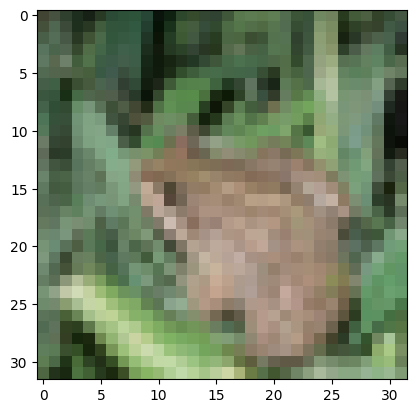

In [53]:
test_ds = ImageFolder(data_dir+'/test', transform=Ten())
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size*2),device)
from pred import predict_image as PI
img, label = test_ds[6000]
plt.imshow(img.permute((1,2,0)))
print(dataset.classes)
print('Label:',dataset.classes[label],', Prediction: ', dataset.classes[PI(img, model, device)])

In [54]:
import os
#cur_dir = os.path.dirname(os.path.abspath(__file__))
cur_dir = os.getcwd()
save_path = os.path.join(cur_dir, 'models/Saved-number-CNN-model-weights.pth')
save_path_md = os.path.join(cur_dir, 'models/Saved-number-CNN-model.pt')
torch.save(model.state_dict(),save_path)
torch.save(model, save_path_md)